# Session 1: Exploring Data

Welcome to the first session of our hands-on data science and machine learning series!

In this session, we will:
- Introduce the **Data Science workflow**
- Load a real-world dataset using `scikit-learn`
- Explore the structure and content of the data using `pandas` and `numpy`
- Visualize patterns and relationships using `matplotlib` and `seaborn`
- Prepare the ground for building ML models in the next session

> **Today's Dataset:** Breast Cancer Wisconsin Diagnostic dataset

## What is a dataset?
A dataset is a collection of related information, usually organized in a table.

Each row is an item or example, and each column is a feature or property about that item.

---> Think of it like an Excel spreadsheet where each row is a person, product, or event, and each column holds details like age, price, or date.

## 🔄 The Data Science Workflow

Understanding a dataset is the **first and most critical step** in any machine learning project.

Here’s a typical workflow:

1. **Data Collection**: From a database, CSV, or API
2. **Exploratory Data Analysis (EDA)**: Visualizing, summarizing, and spotting patterns
3. **Data Cleaning**: Handling missing values, removing duplicates
4. **Modeling**: __Classification__, regression, clustering, etc.
5. **Evaluation**: Accuracy, precision, recall, etc.
6. **Deployment**: Use model in production or business settings

Today, we focus entirely on **step 3: Exploratory Data Analysis**.


EDA = Smart Start
Exploring your data helps you:

    Clean it better
    Choose better preprocessing techniques
    Select the right model

Think of it like reading the map before starting a journey — it saves time and improves results.

# ===================================================
# libraries
# ===================================================

### 🧪 What Do These Libraries Do?

| Library        | Purpose                                                                 |
|----------------|-------------------------------------------------------------------------|
| `pandas`       | Tabular data manipulation (like Excel tables)                           |
| `numpy`        | Fast numerical operations and arrays                                    |
| `matplotlib`   | Low-level charting library (bar charts, line graphs, etc.)              |
| `seaborn`      | Built on matplotlib; better default visuals for statistical plots       |
| `scikit-learn` | Machine learning library; we use it only to load a dataset here         |
| `collections`  | Provides specialized data structures like `Counter`, `defaultdict`, and `deque` |


In [1]:
# pandas is used for handling tabular data (like Excel tables)
# !pip install pandas
import pandas as pd

In [2]:
# numpy is used for numerical operations (like arrays and math functions)
# !pip install numpy --> It is commented out because installing pandas also installs NumPy automatically.
import numpy as np

In [3]:
# matplotlib is used to create static charts (bar charts, line graphs, etc.)
# !pip install matplotlib
import matplotlib.pyplot as plt

In [4]:
# seaborn is a wrapper on top of matplotlib that makes prettier and more informative visualizations
# !pip install seaborn
import seaborn as sns

In [5]:
# Scikit-learn is a machine learning library. For now, we’ll use it just to load a dataset,
# but later it will offer ML models and various other tools.
# !pip install scikit-learn
from sklearn.datasets import load_breast_cancer

In [6]:
# Import Counter to count occurrences of each class
from collections import Counter

# ===================================================
# Load the Breast Cancer dataset
# ===================================================

## About the Dataset

The Breast Cancer Wisconsin Dataset is mainly used for binary classification problems

This dataset contains information about **digitized features of breast masses**, obtained from images of fine needle aspirates (FNA) of breast tumors.

- **Target (label)**: 
  - `0`: malignant (cancerous)
  - `1`: benign (non-cancerous)
- **Objective**: Predict whether the tumor is malignant or benign based on features.

In [7]:
# Load dataset from scikit-learn
cancer = load_breast_cancer() #dictionary
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
cancer["target_names"] #label_name

array(['malignant', 'benign'], dtype='<U9')

In [9]:
print("data type", type(cancer["data"]))

data type <class 'numpy.ndarray'>


In [10]:
print(cancer["data"])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [11]:
# Convert it to a pandas DataFrame for easier analysis
data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add the target column (0 = malignant, 1 = benign) to the DataFrame
data['target'] = cancer.target

Rule of Thumb
- DataFrames → When exploring, cleaning, or analyzing data, especially when labels matter.

- ndarrays → When training models, doing heavy math, or working only with numbers.

In [12]:
# Show the shape (rows, columns)
print(f"\nDataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


Dataset contains 569 rows and 31 columns.


In [13]:
# Print the first 10 rows of the dataset
print("🔍 First 10 rows of the dataset:")
data[:10]
# data.head() # Print the first 5 rows of the dataset

🔍 First 10 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [14]:
# Displays all feature_names of the Dataset
print(data.keys())

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


## Dataset Description

In [15]:
print(cancer.DESCR[:2908])  # Display first part of the dataset description

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# ===================================================
# Summary Statistics
# ===================================================

In [16]:
# Summary statistics for each feature (mean, std, min, etc.)
print("\n Summary statistics:")
data.describe()


 Summary statistics:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


25% → First quartile (Q1):
- 25% of the data values are less than or equal to this number.

50% → Median (Q2):
- Half the data is below this value, half above.

75% → Third quartile (Q3):
- 75% of the data is less than or equal to this number.

### Why Know Summary Statistics?

- Understand feature scales → detect if features need scaling.
- Spot outliers → find unusual or erroneous values.
- Check variability → low-variance features may be useless.
- Detect skewness → mean vs median differences inform transformations.
- Plan preprocessing → decide on scaling, normalization, or feature removal.

these questions will be answered in next session.
1. Why Scale Features?
2. Why Spot Outliers?
3. Why Check Variability?
4. ...

## group by features

In [17]:
# What is grouping by?
# Group by target and calculate the mean for each feature
grouped_means = data.groupby('target').mean()
print("\n Mean values of features grouped by target class:")
grouped_means.head()
# 0 --> cancerous
# 1 --> non-cancerous


 Mean values of features grouped by target class:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# ===================================================
# 📈 Visualizations - Understanding Data
# ===================================================

## 1. Target Class Counts

- Goal: See how many cases are malignant vs benign.
- Plot: Count plot with bars for each class.
- Why: Helps spot class imbalance.

In [18]:
# Use Counter to count how many times each class label appears
class_counts = Counter(data["target"])

# Print the result (e.g., Counter({1: 357, 0: 212}))
print("Class distribution:", class_counts)

Class distribution: Counter({1: 357, 0: 212})


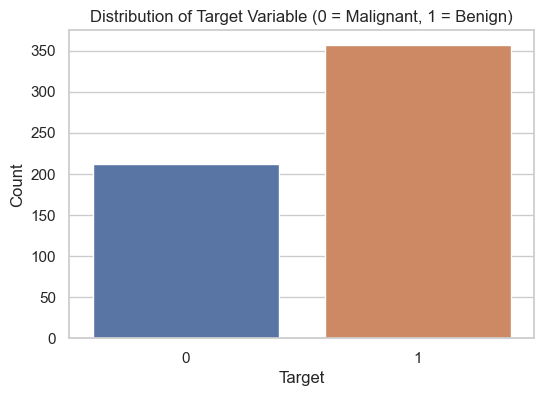

In [19]:
# Set a beautiful style for plots
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable (0 = Malignant, 1 = Benign)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

### What is data imbalance?

(Q: Recall classification)
- Data imbalance occurs when the classes (categories) in a *classification* dataset are not represented equally — meaning one class appears much more frequently than the other(s).
- This can lead to biased models that perform well on the majority class but poorly on the minority.
- In next session, how to handle data imbalance will be explored.

## 2. Distribution of a feature

### What is the distribution of the data?

The distribution of a feature shows how the values of that feature are spread out across all the data points.

If a feature is "age", the distribution tells you:

    Are most people in their 20s?
    Are values spread evenly?
    Are there a few very high or low ages (outliers)?

Knowing the distribution helps you clean, transform, and model your data more effectively — leading to better performance and more reliable results.

### What is a histogram?

histogram shows how often different ranges of values appear in a dataset.

🔍 Simple Explanation:

    Imagine you have the ages of 100 people.
    A histogram groups those ages into ranges (like 0–10, 11–20, 21–30, etc.).
    Then it shows how many people fall into each age range using bars.
    Taller bars mean more data points in that range.

In [20]:
# Select a few features to visualize distributions
features_to_plot = ['mean radius', 'mean texture', 'mean area', 'mean smoothness']

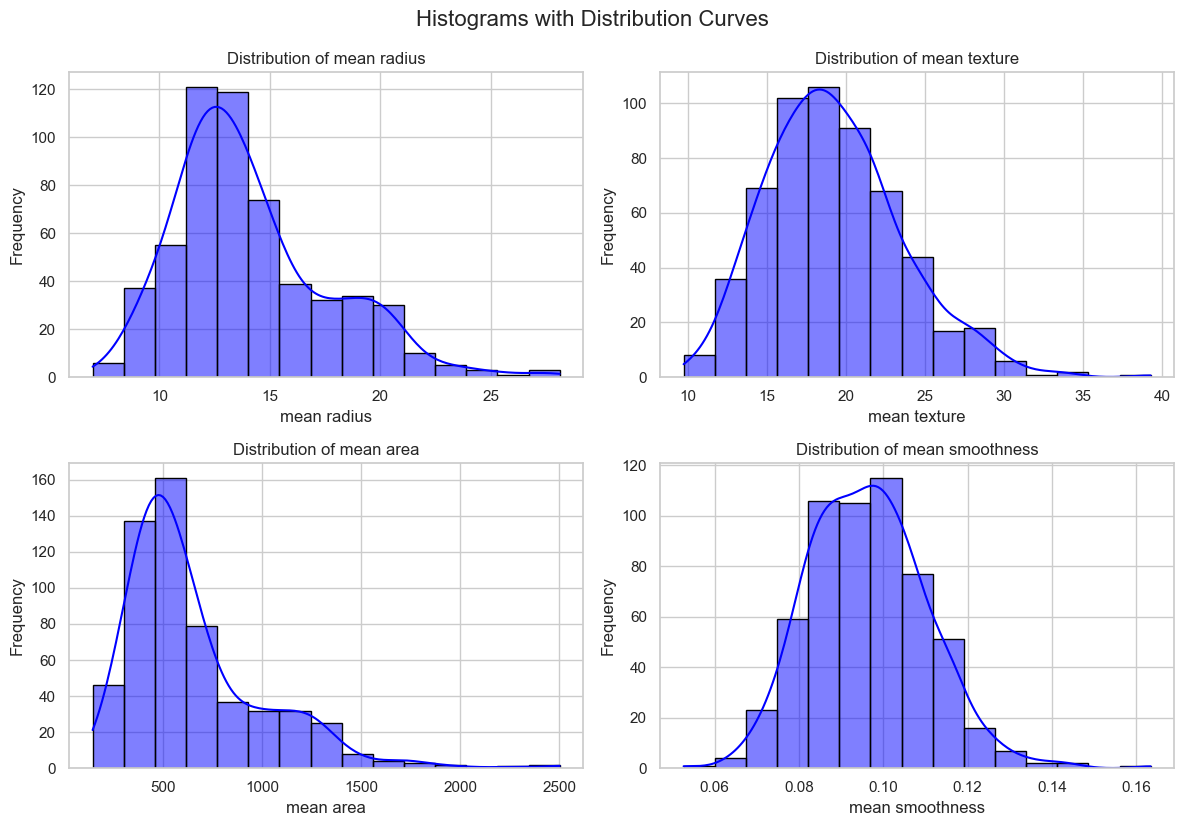

In [21]:
# Create histogram + distribution (KDE) plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[feature], bins=15, kde=True, color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histograms with Distribution Curves', fontsize=16, y=1.03)
plt.show()

#### Why detect skewness?
- Understand data shape
    - tells if values lean more to one side.
- Affects statistical tests
    - many assume normal (no skew) distribution.
- Guides transformations
    - skewed data may need log/sqrt scaling.
- Improves model performance
    - some algorithms work better with less skew.

## 3. Scatter plot

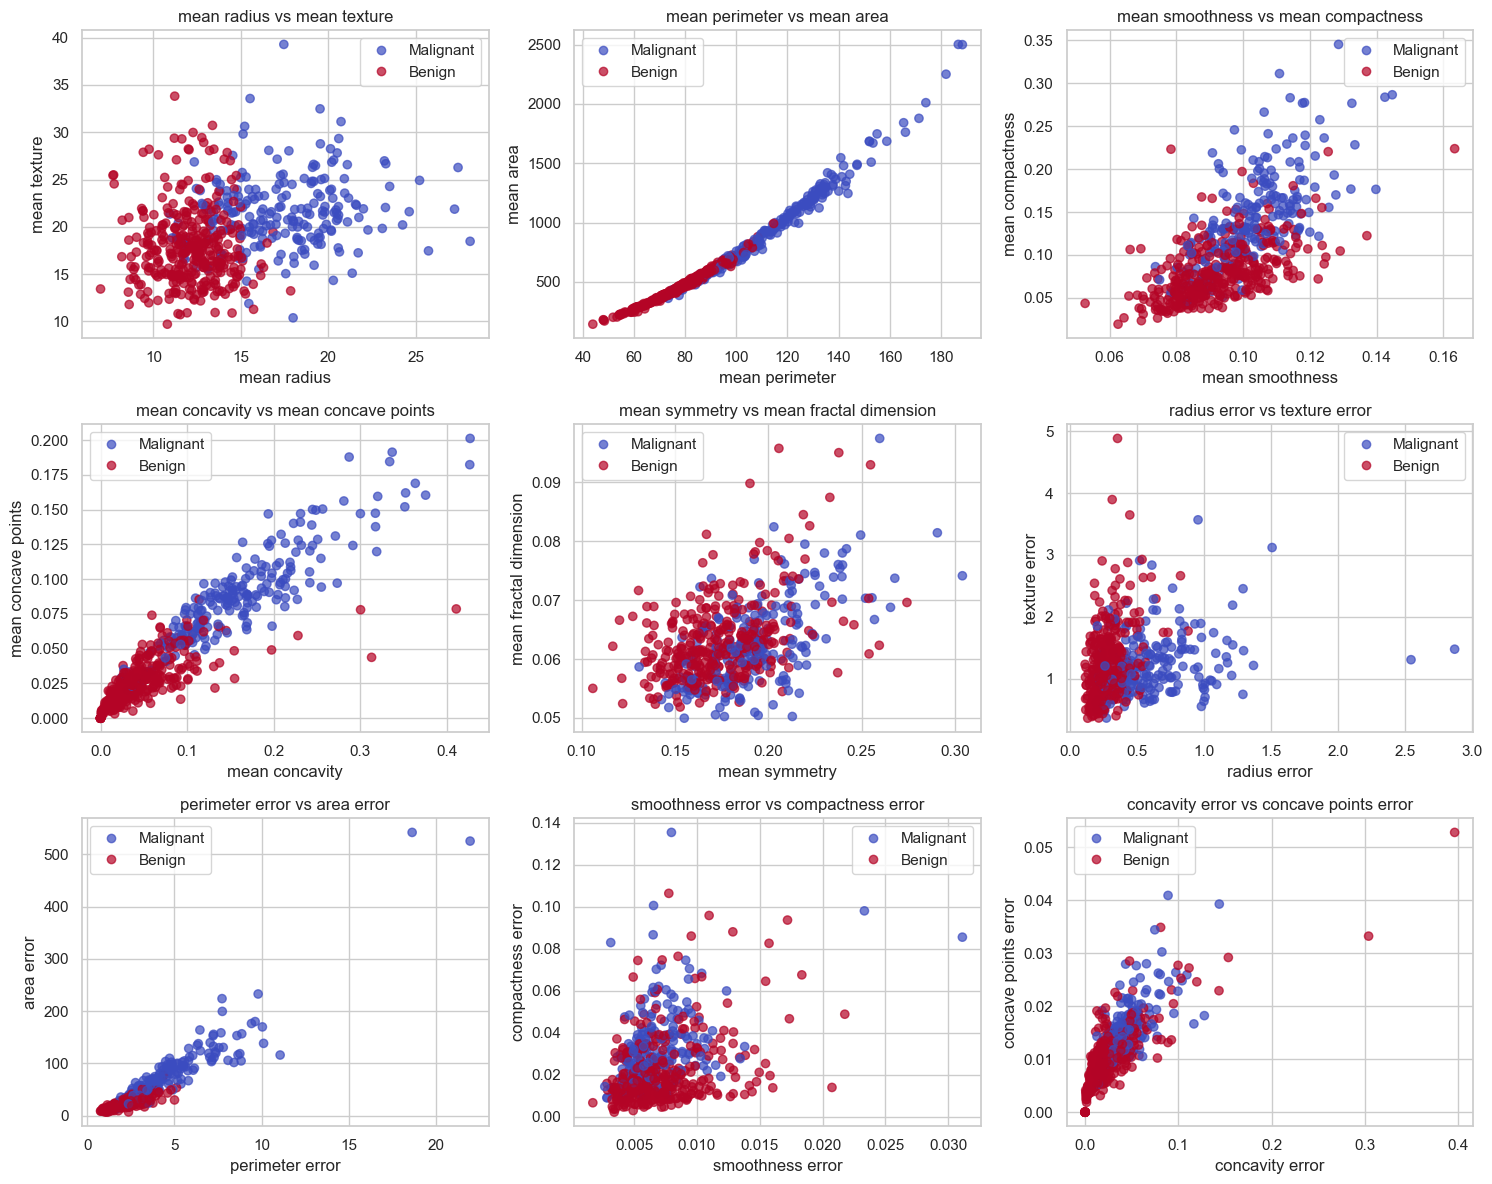

In [22]:
# using mathplotlib
# Create 9 scatter plots for different feature pairs in a 3x3 grid
feature_pairs = [
    ('mean radius', 'mean texture'),
    ('mean perimeter', 'mean area'),
    ('mean smoothness', 'mean compactness'),
    ('mean concavity', 'mean concave points'),
    ('mean symmetry', 'mean fractal dimension'),
    ('radius error', 'texture error'),
    ('perimeter error', 'area error'),
    ('smoothness error', 'compactness error'),
    ('concavity error', 'concave points error')
]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, (x_feat, y_feat) in enumerate(feature_pairs):
    scatter = axes[i].scatter(
        data[x_feat], 
        data[y_feat], 
        c=data['target'], 
        cmap='coolwarm', 
        alpha=0.7
    )
    axes[i].set_xlabel(x_feat)
    axes[i].set_ylabel(y_feat)
    axes[i].set_title(f'{x_feat} vs {y_feat}')

    # Add legend to the last subplot
    axes[i].legend(handles=scatter.legend_elements()[0], labels=['Malignant', 'Benign'])

plt.tight_layout()
plt.show()

### Why use a scatter plot?
- See relationships between two variables.
- Check class separation (e.g., malignant vs benign).
- Find patterns like trends or clusters.
- Spot outliers easily.
- Help choose features for modeling.

## 4. Pair Plot

A pair plot shows scatter plots for every possible pair of selected features, plus histograms for each feature on the diagonal.
It helps you:

* **See relationships** between multiple features.
* **Spot patterns or separation** between classes when colored by a category.
* **Check distributions** of each feature along the diagonal.


C:\Users\Sh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


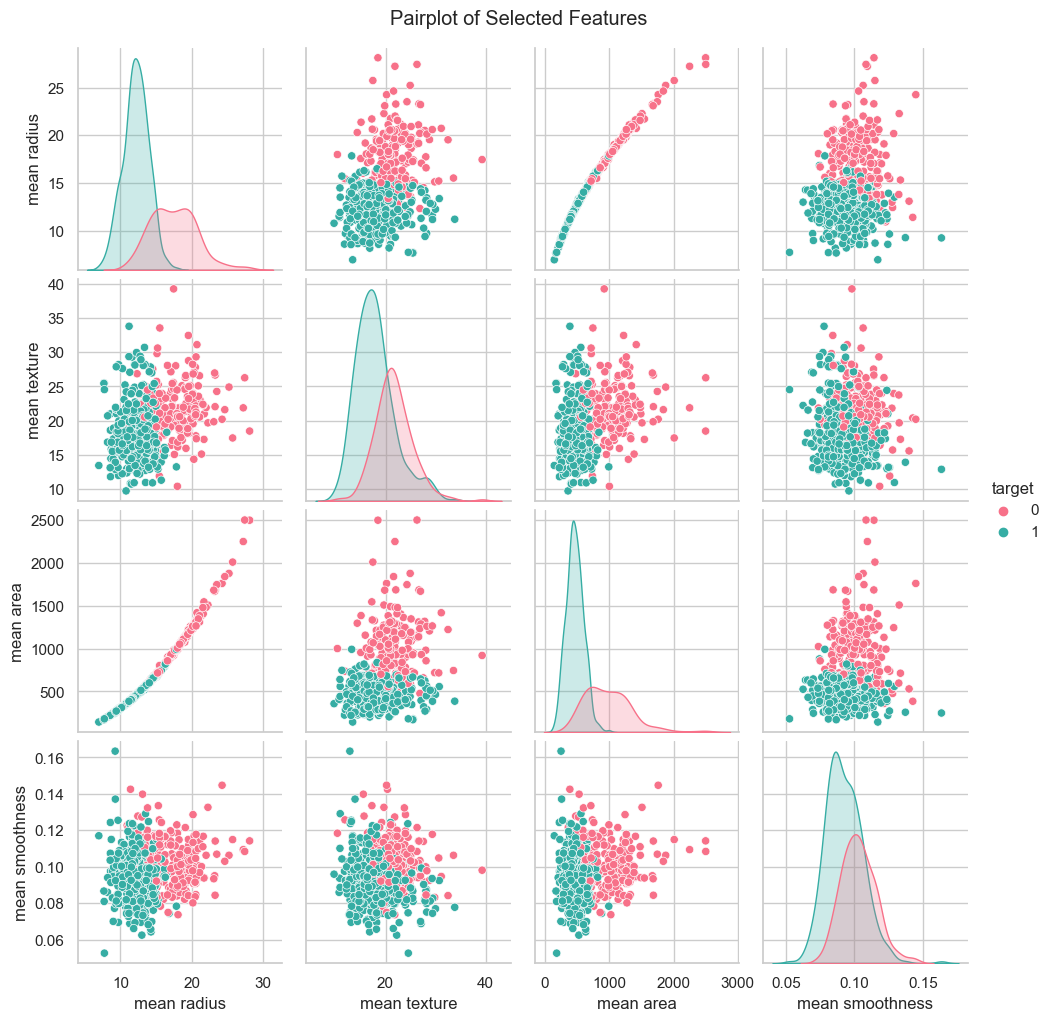

In [23]:
#using seaborn
# Pairplot of selected features colored by class
sns.pairplot(data[features_to_plot + ['target']], hue='target', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

## 5. Pearson Correlation Coefficient

### what is correlation?

Correlation tells us how strongly two features (variables) are related — in other words, whether they move together, and how.

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \ \sqrt{\sum (y_i - \bar{y})^2}}
$$

Where:

* $x_i, y_i$ are values of the two variables
* $\bar{x}, \bar{y}$ are the means of those variables

Because of this standardization, $r$ is unitless and always between __–1__ and __1__.

#### **Interpretation**

* **$r > 0$** → **Positive correlation**: as one variable increases, the other tends to increase.
* **$r < 0$** → **Negative correlation**: as one variable increases, the other tends to decrease.
* **$r = 0$** → No linear relationship between variables.

#### Example: Texture vs. Smoothness

- **Texture**: Variation in brightness inside the tumor (std. dev. of gray-scale values).  
  - High = irregular internal structure → **more likely malignant**  
  - Low = uniform tissue → **more likely benign**  

- **Smoothness**: Evenness of the tumor’s outline (variation in radius lengths).  
  - High = round, smooth edges → **more likely benign**  
  - Low = bumpy, irregular edges → **more likely malignant**  

- They are probably negatively correlated, so in the heatmap that should appear as blue (indicating negative correlation).


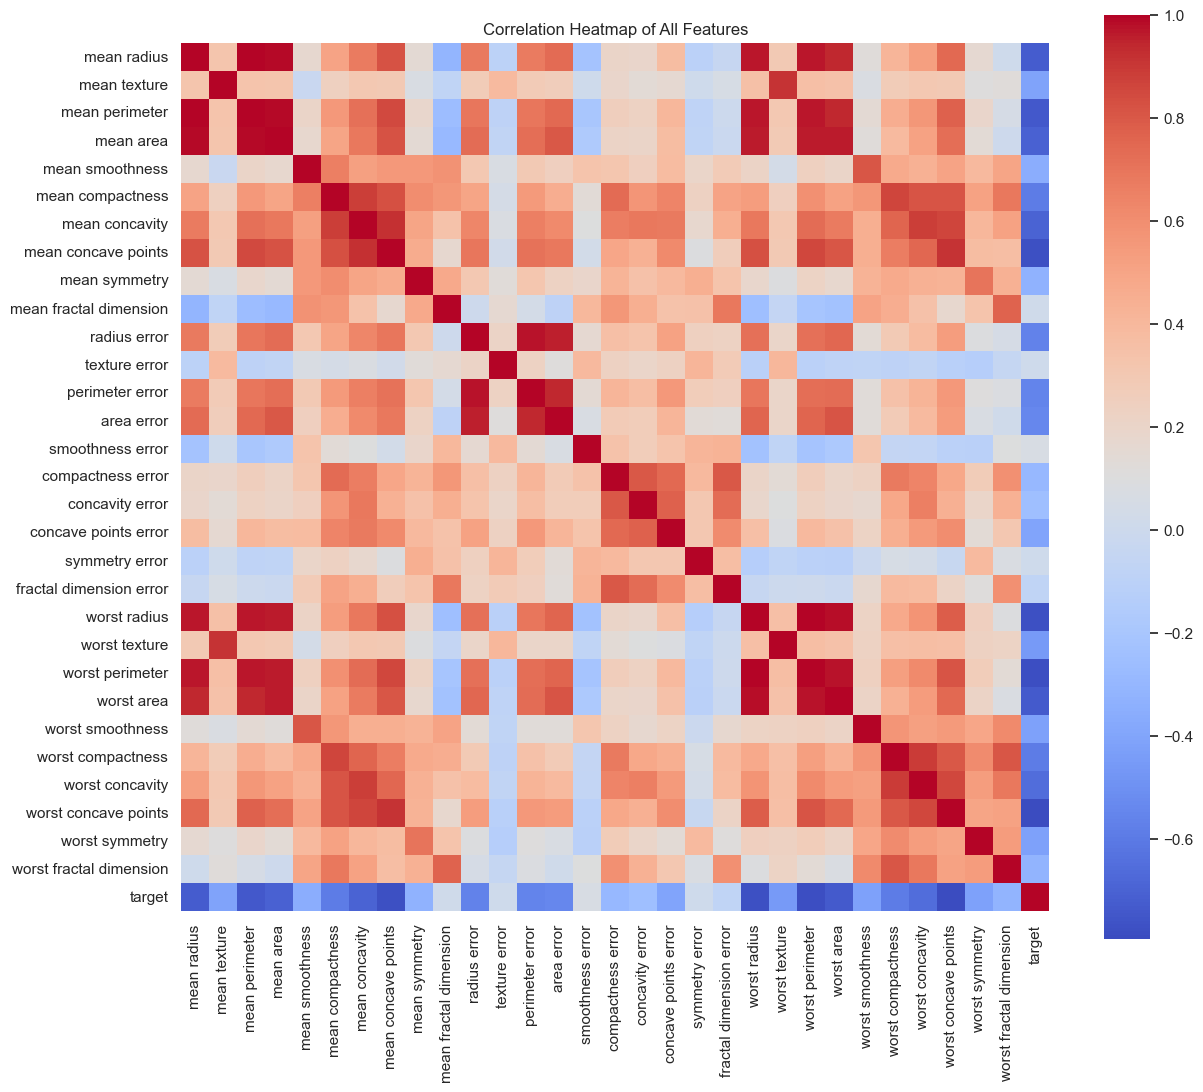

In [24]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of All Features')
plt.show()

### Q: Why is the main diagonal completely red?

### Q: How does a high correlation appear in a plot?

In a scatter plot, high correlation appears as points closely following a straight line — upward slope for positive correlation, downward slope for negative correlation.

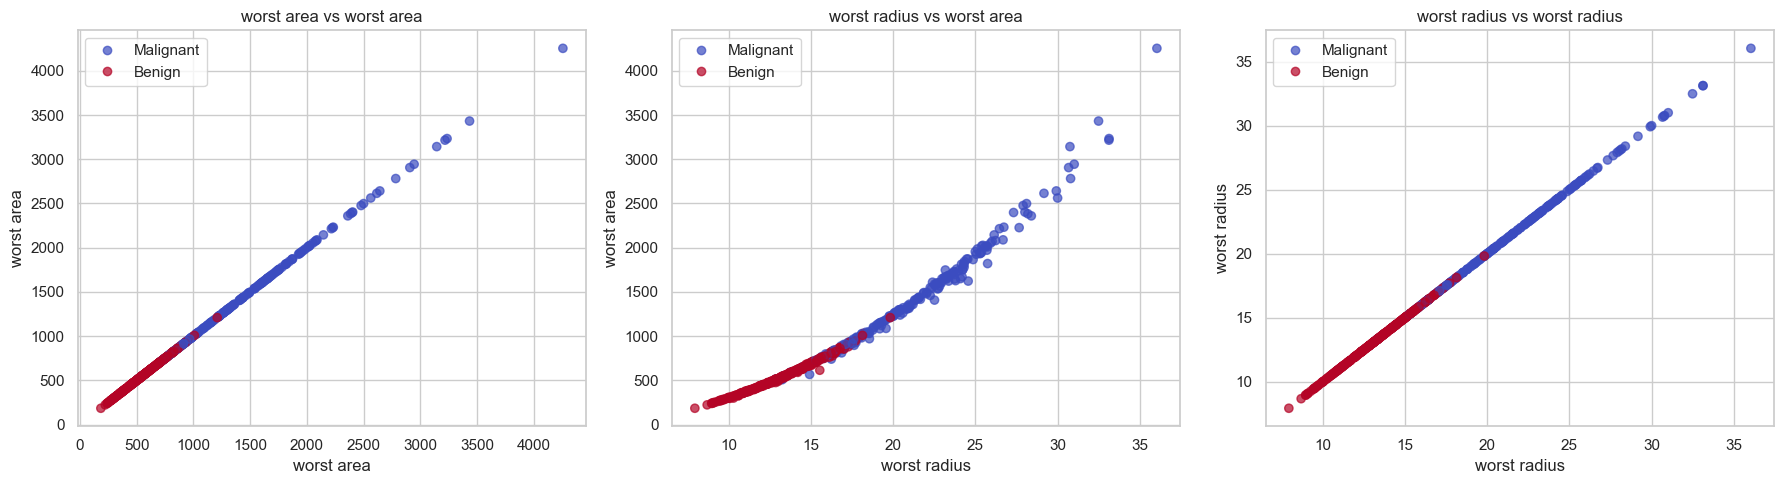

In [25]:
# Define three feature pairs
feature_pairs = [
    ('worst area', 'worst area'),
    ('worst radius', 'worst area'),
    ('worst radius', 'worst radius')
]

# Create subplots in 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
i = 0
for ax, (x_feat, y_feat) in zip(axes, feature_pairs):
    scatter = ax.scatter(
        data[x_feat],
        data[y_feat],
        c=data['target'],
        cmap='coolwarm',
        alpha=0.7
    )
    ax.set_xlabel(x_feat)
    ax.set_ylabel(y_feat)
    ax.set_title(f'{x_feat} vs {y_feat}')

    # Add legend to last subplot
    axes[i].legend(handles=scatter.legend_elements()[0], labels=['Malignant', 'Benign'])
    i += 1
plt.tight_layout()
plt.show()


### Why Is correlation Useful?
1. Feature Selection
    - You can remove highly correlated features to avoid redundancy.
2. Insight into Data
    - Correlation helps you understand relationships in your data.

## 6. Box Plot

1. Sort the data (smallest → largest).
2. Find quartiles:
    - Q1 = 25th percentile
    - Q2 (median) = 50th percentile
    - Q3 = 75th percentile
3. Compute IQR: IQR = Q3 - Q1.
4. Set fences:
    - Lower fence = Q1 - 1.5 × IQR
    - Upper fence = Q3 + 1.5 × IQR
5. Whiskers:
    - extend to the smallest/largest data points within the fences.
7. Outliers:
    - any points outside the fences, plotted as individual dots.
9. Draw:
    - box from Q1→Q3, line at median. Whiskers from box to the end points in step 5.

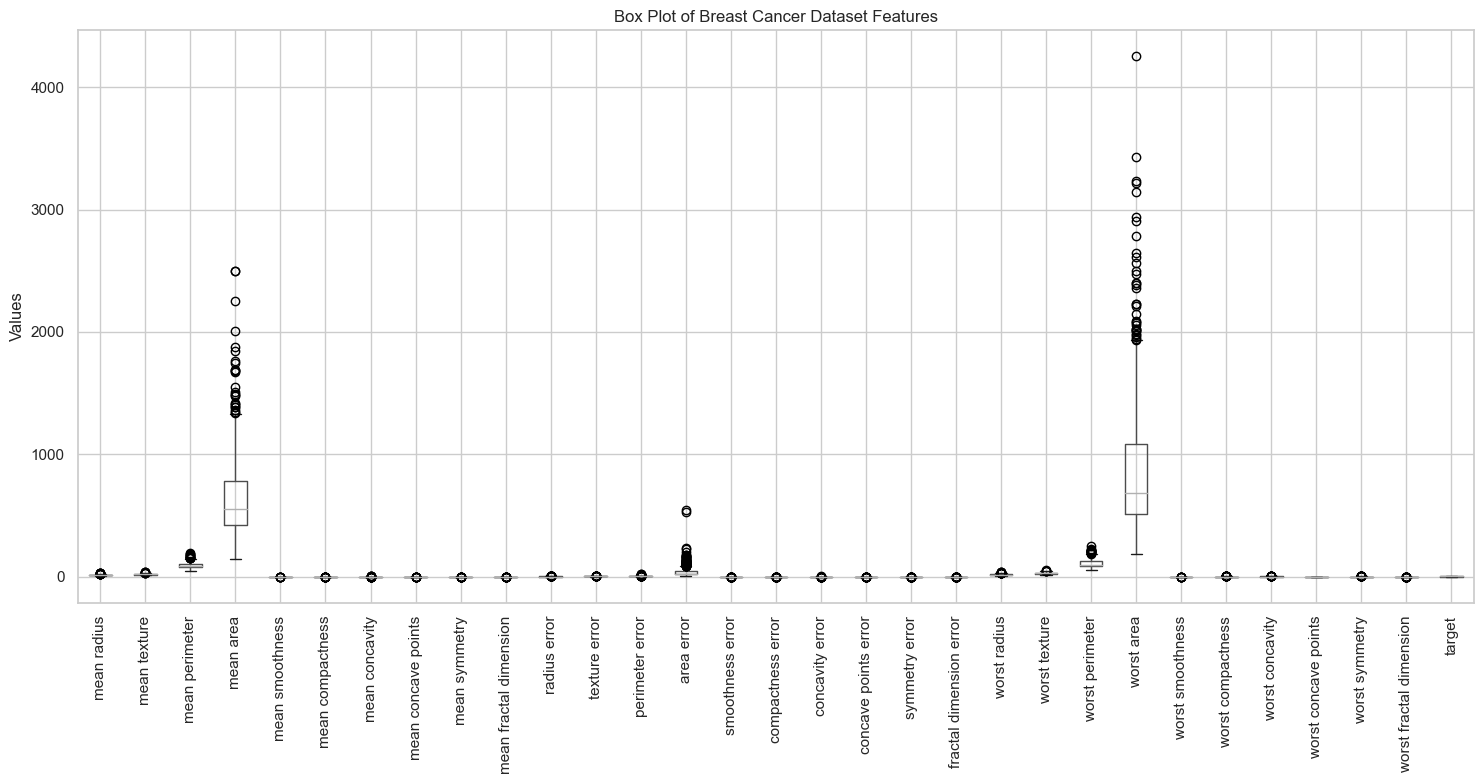

In [26]:
# Create box plots for all features
plt.figure(figsize=(15, 8))
data.boxplot(rot=90)  # rotate labels for readability
plt.title("Box Plot of Breast Cancer Dataset Features")
plt.ylabel("Values")
plt.tight_layout()
plt.show()

The features with more outliers (many circles above/below the whiskers) are:
- mean area
- area error
- worst area

### Why use a box plot?
- Quickly compare distributions between datasets or features.
- Spot outliers in the data.
- See data spread and detect skewness.

# ===================================================
# Next Session Task
# ===================================================

In [28]:
# Task: Perform EDA on this dataset and conclude insights from it.
from sklearn.datasets import load_wine
task_dataset = load_wine()
df = pd.DataFrame(task_dataset.data, columns=task_dataset.feature_names)
df['target'] = task_dataset.target

# ===================================================
# Summary
# ===================================================

1. Imported essential libraries used in data science
2. Loaded a dataset (Breast Cancer) from scikit-learn
3. Converted it into a pandas DataFrame
4. Explored the structure, content, and summary of the data
5. Visualized distributions and relationships between features
6. Computed basic statistics grouped by class label
7. Created visual plots to make the data easier to understand